In [2]:
import warnings
from helper import *

In [3]:
# basic configuration
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_columns', 500)

In [4]:
# get the data files and their paths
file_dict, file_dir, master_dir = get_data_files()

In [5]:
# initialize the master dataframe to store all the data
master_df = pd.DataFrame()

In [6]:
# get the file indexes
available_file_indexes = get_file_indexes(file_dict=file_dict)

In [7]:
# years to be considered for the forecast
selected_years = [2021, 2022, 2023]

In [8]:
# get file names for the given year(s)
file_dict_given_years = create_file_dict(file_dict=file_dict, years=selected_years)

In [9]:
# find the top 20 pipes for every file
for year, files in file_dict_given_years.items():
    access_index = 0
    for index in available_file_indexes[year]:
        master_df = find_common_pipes(file_index=access_index, file_year=year,
                                      top_level_df=master_df, file_dict=file_dict,
                                      master_dir=master_dir, threshold=50)
        access_index += 1

In [10]:
# create dataframe contains pipe production data for every week and write them to Excel files
exp_df, exp_df_th = create_transposed_and_unique_df(master_df=master_df,
                                                    sheet_names=["General", "Experimental"],
                                                    file_dir=file_dir)

In [11]:
# format the Excel files
format_general_sheet(file_dir=file_dir)
format_experimental_sheet(file_dir=file_dir)

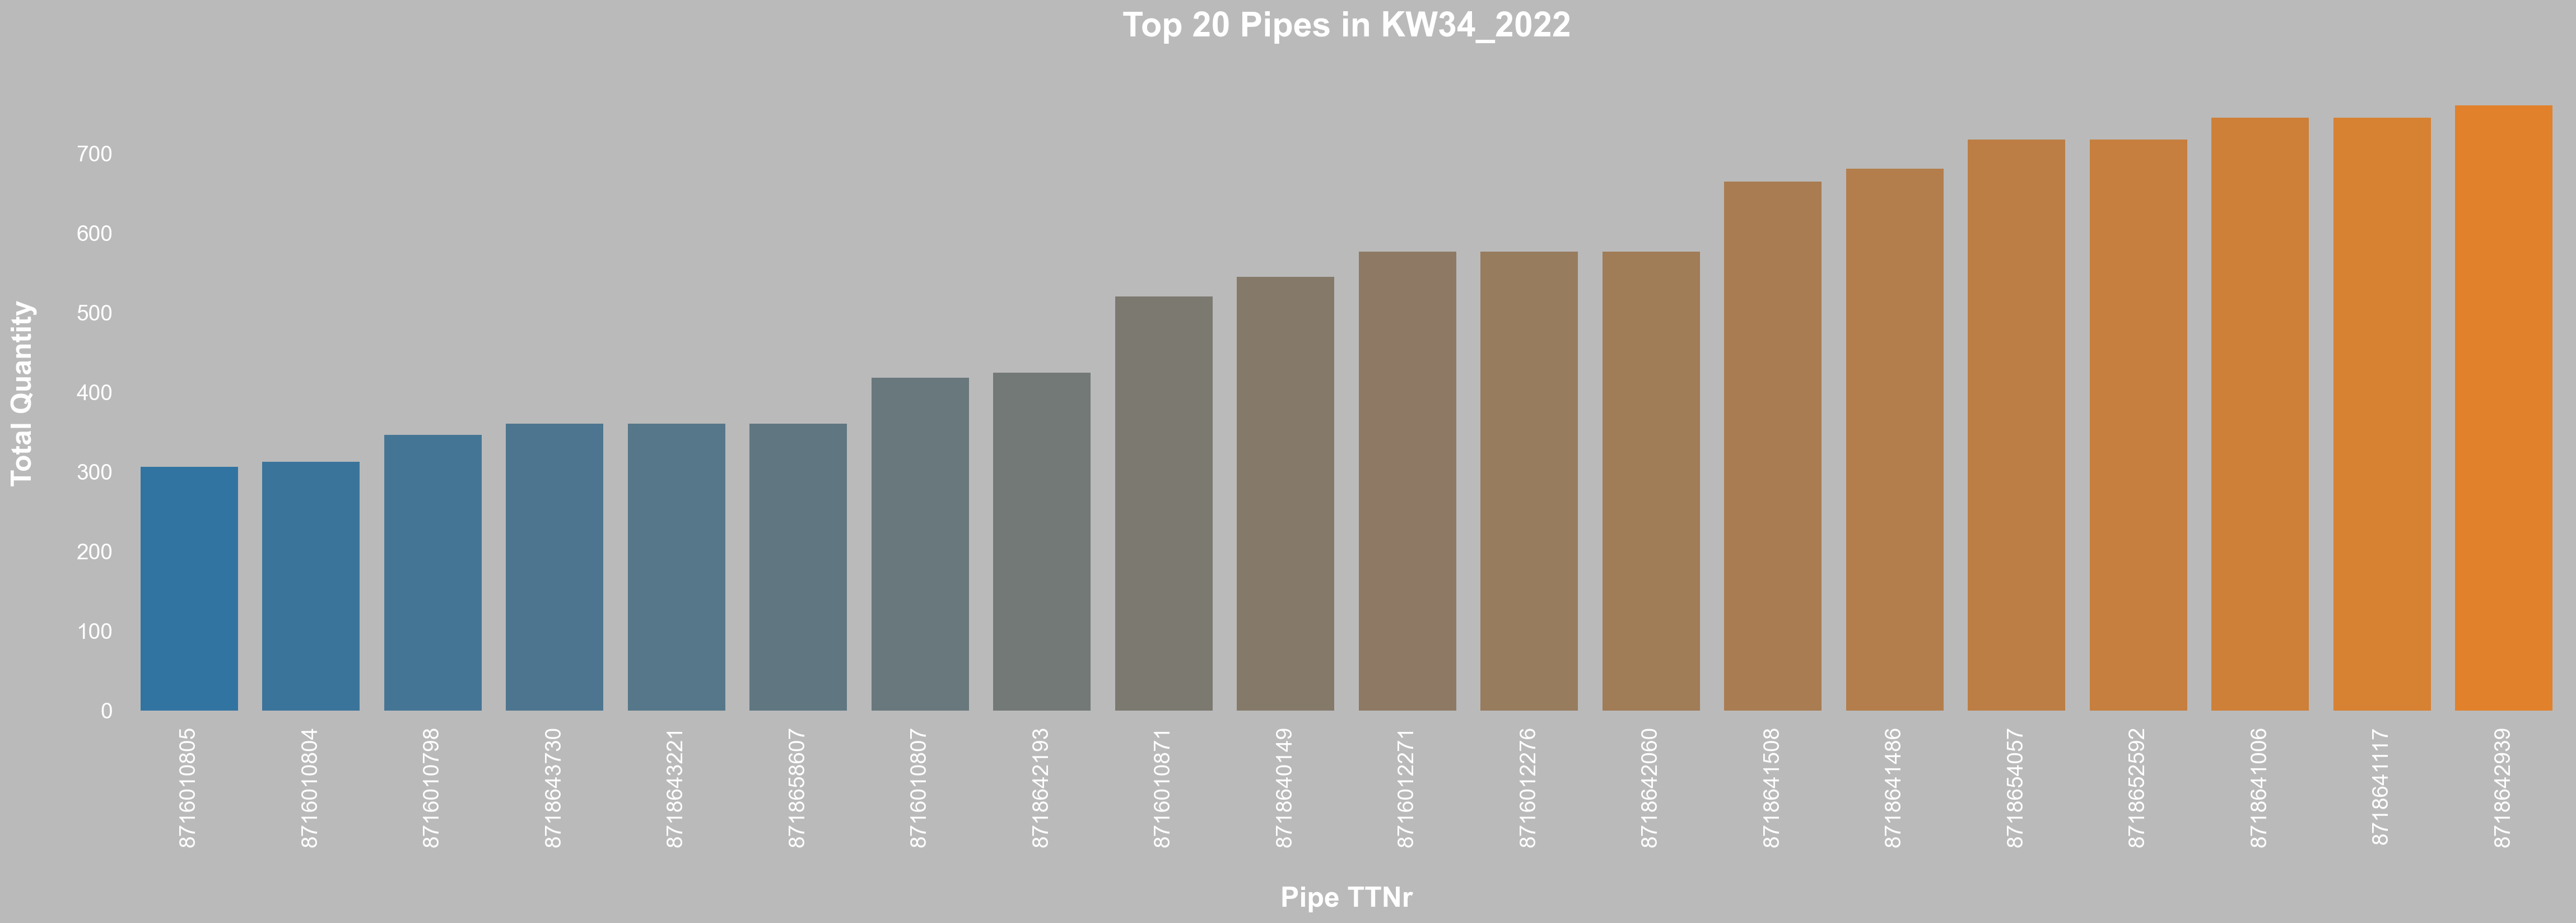

In [12]:
# plot the most popular 20 pipes for a specific week
create_bar_plot(df=exp_df_th,
                selected_year=2022,
                file_index="34",
                ascending=True,
                threshold=20,
                figsize=(25, 7))

In [13]:
# create a unique dataframe that contains all the data (2021-2023)
final_df = create_unique_df(df=exp_df)

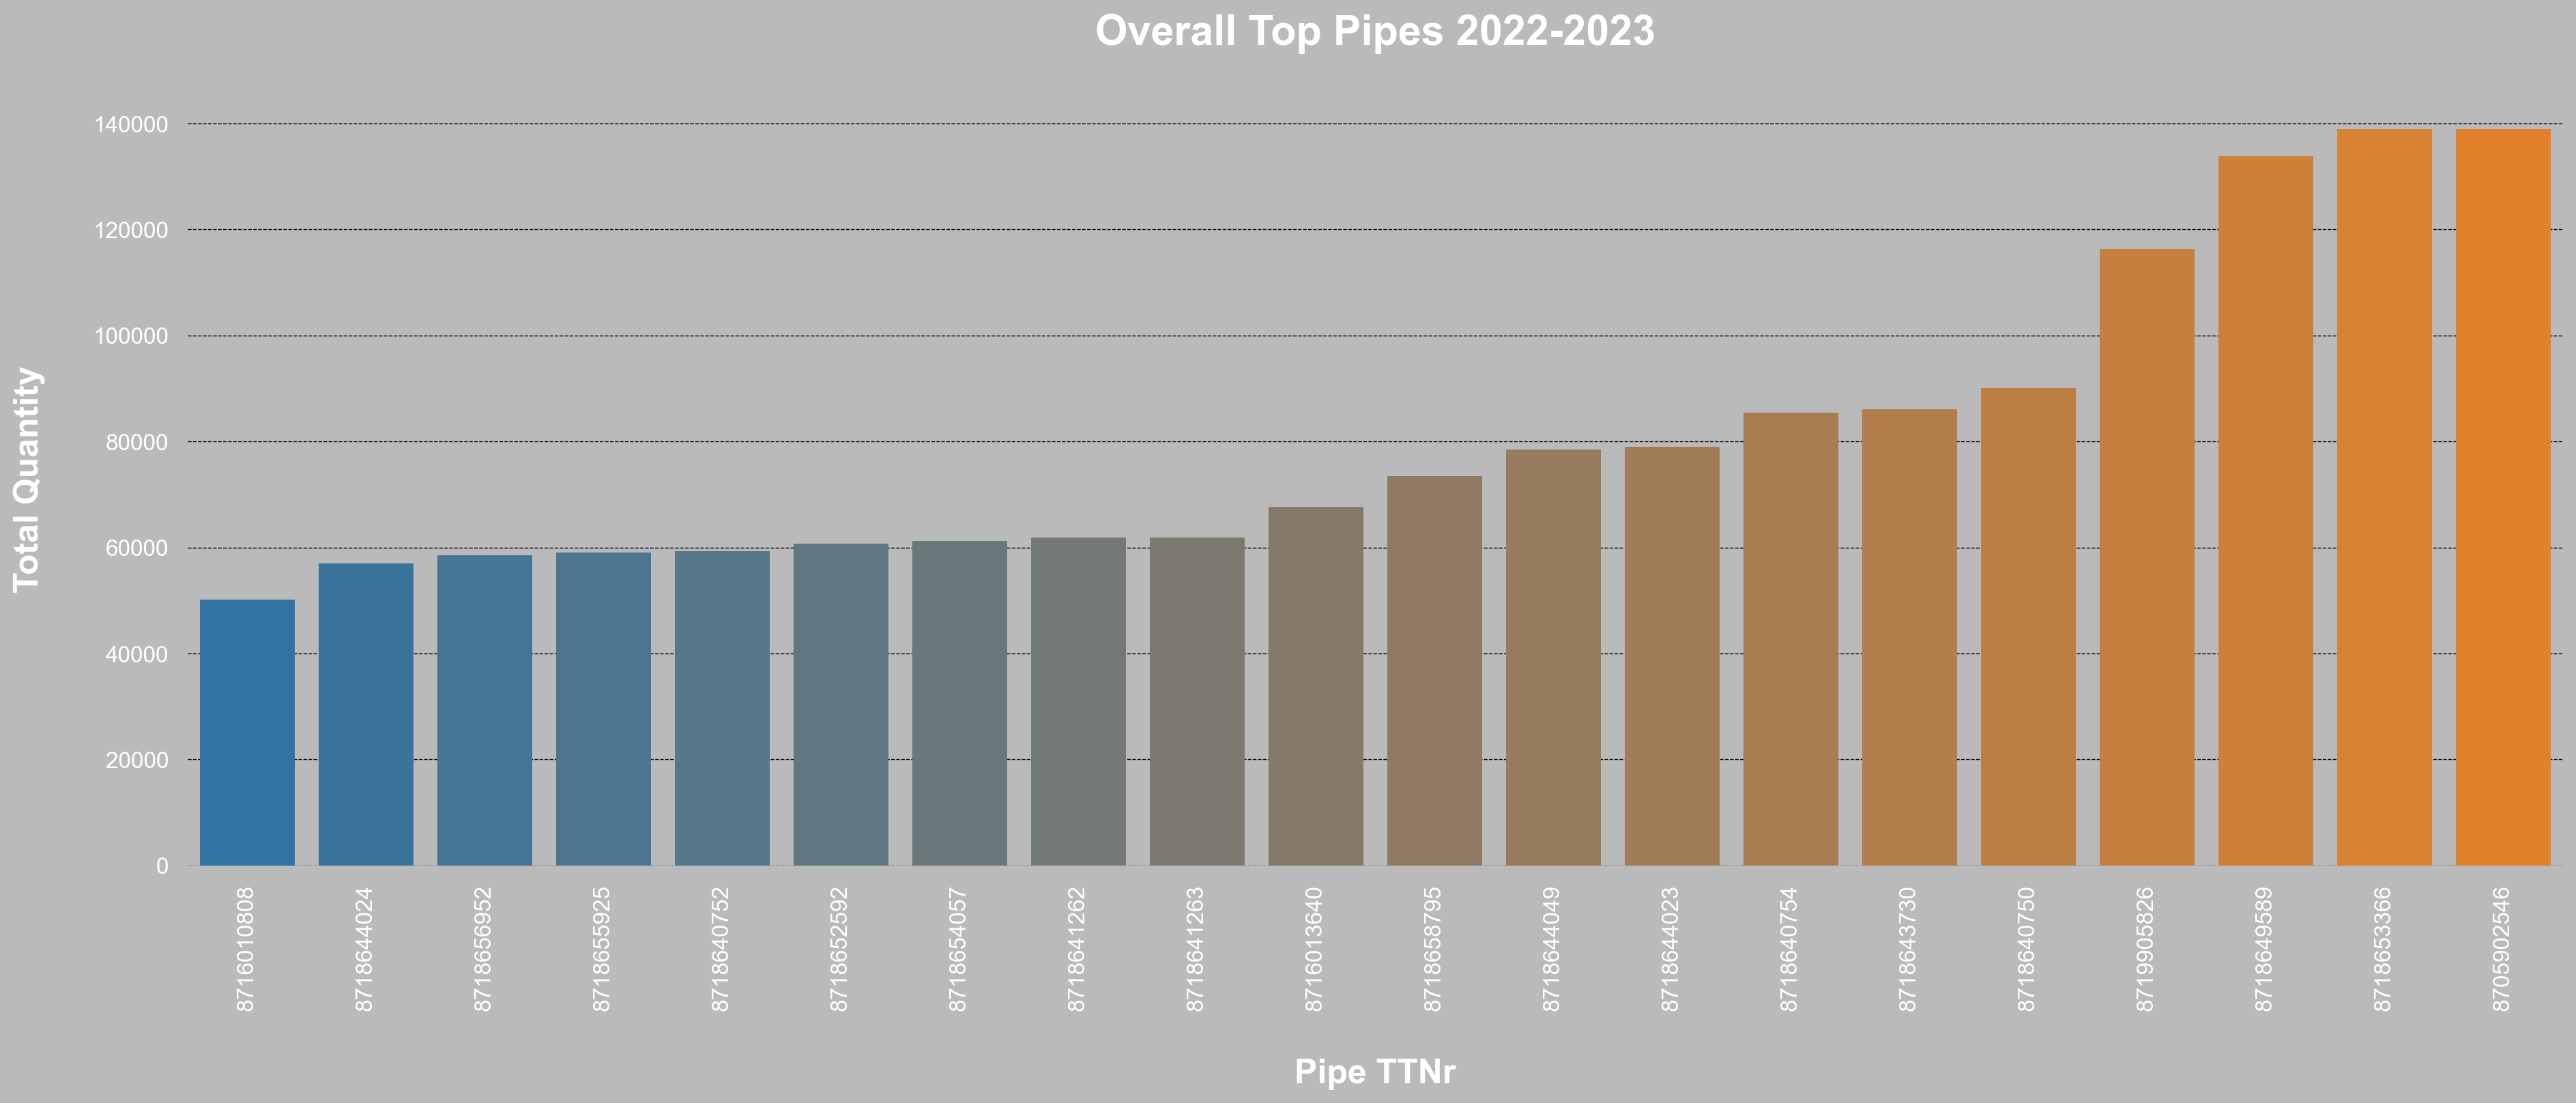

In [14]:
# plot the most popular 20 pipes for all the weeks (2021-2023)
unique_pipe_bar_plot(pipe_df=final_df,
                     total_quantity_limit=50000,
                     fig_size=(20, 7),
                     rotation='vertical',
                     ascending=True,
                     years=[2022, 2023])

In [15]:
# get the occurrences per file
pipe_occurrences_df = get_occurrences_per_file(df=exp_df)

In [16]:
# get the files with a given threshold of occurrences
pipes_in_threshold_df = get_occurrences_with_threshold(df=pipe_occurrences_df, threshold=50)

In [17]:
# filter the dataframe with the top 20 pipes
top_20_pipes = pipe_occurrences_df.iloc[:, 0].head(20)
top_20_pipes_df = list(map(int, pipe_occurrences_df[pipe_occurrences_df.iloc[:, 0].isin(top_20_pipes)].index))

In [18]:
# combine all the files satisfying the threshold for the popular pipes
all_in_one = combine_all_files_within_threshold(
    file_dict=file_dict_given_years, master_dir=master_dir, threshold_df=top_20_pipes_df)
all_in_one_T = convert_multi_to_single_df(df=all_in_one)

In [19]:
all_in_one_T = all_in_one_T.sort_index(inplace=False)

In [20]:
# reindex the all_in_one_T (start from 2022-01-06) and add 7 days for each row
filled_df = all_in_one_T.copy()
if selected_years == [2021, 2022, 2023]:
    filled_df.index = pd.date_range(start='2021-06-23', periods=len(all_in_one_T), freq='W')
elif selected_years == [2022, 2023]:
    filled_df.index = pd.date_range(start='2022-01-06', periods=len(all_in_one_T), freq='W')

# convert the index column to datetime
filled_df.index = filled_df.index.astype('datetime64[ns]')

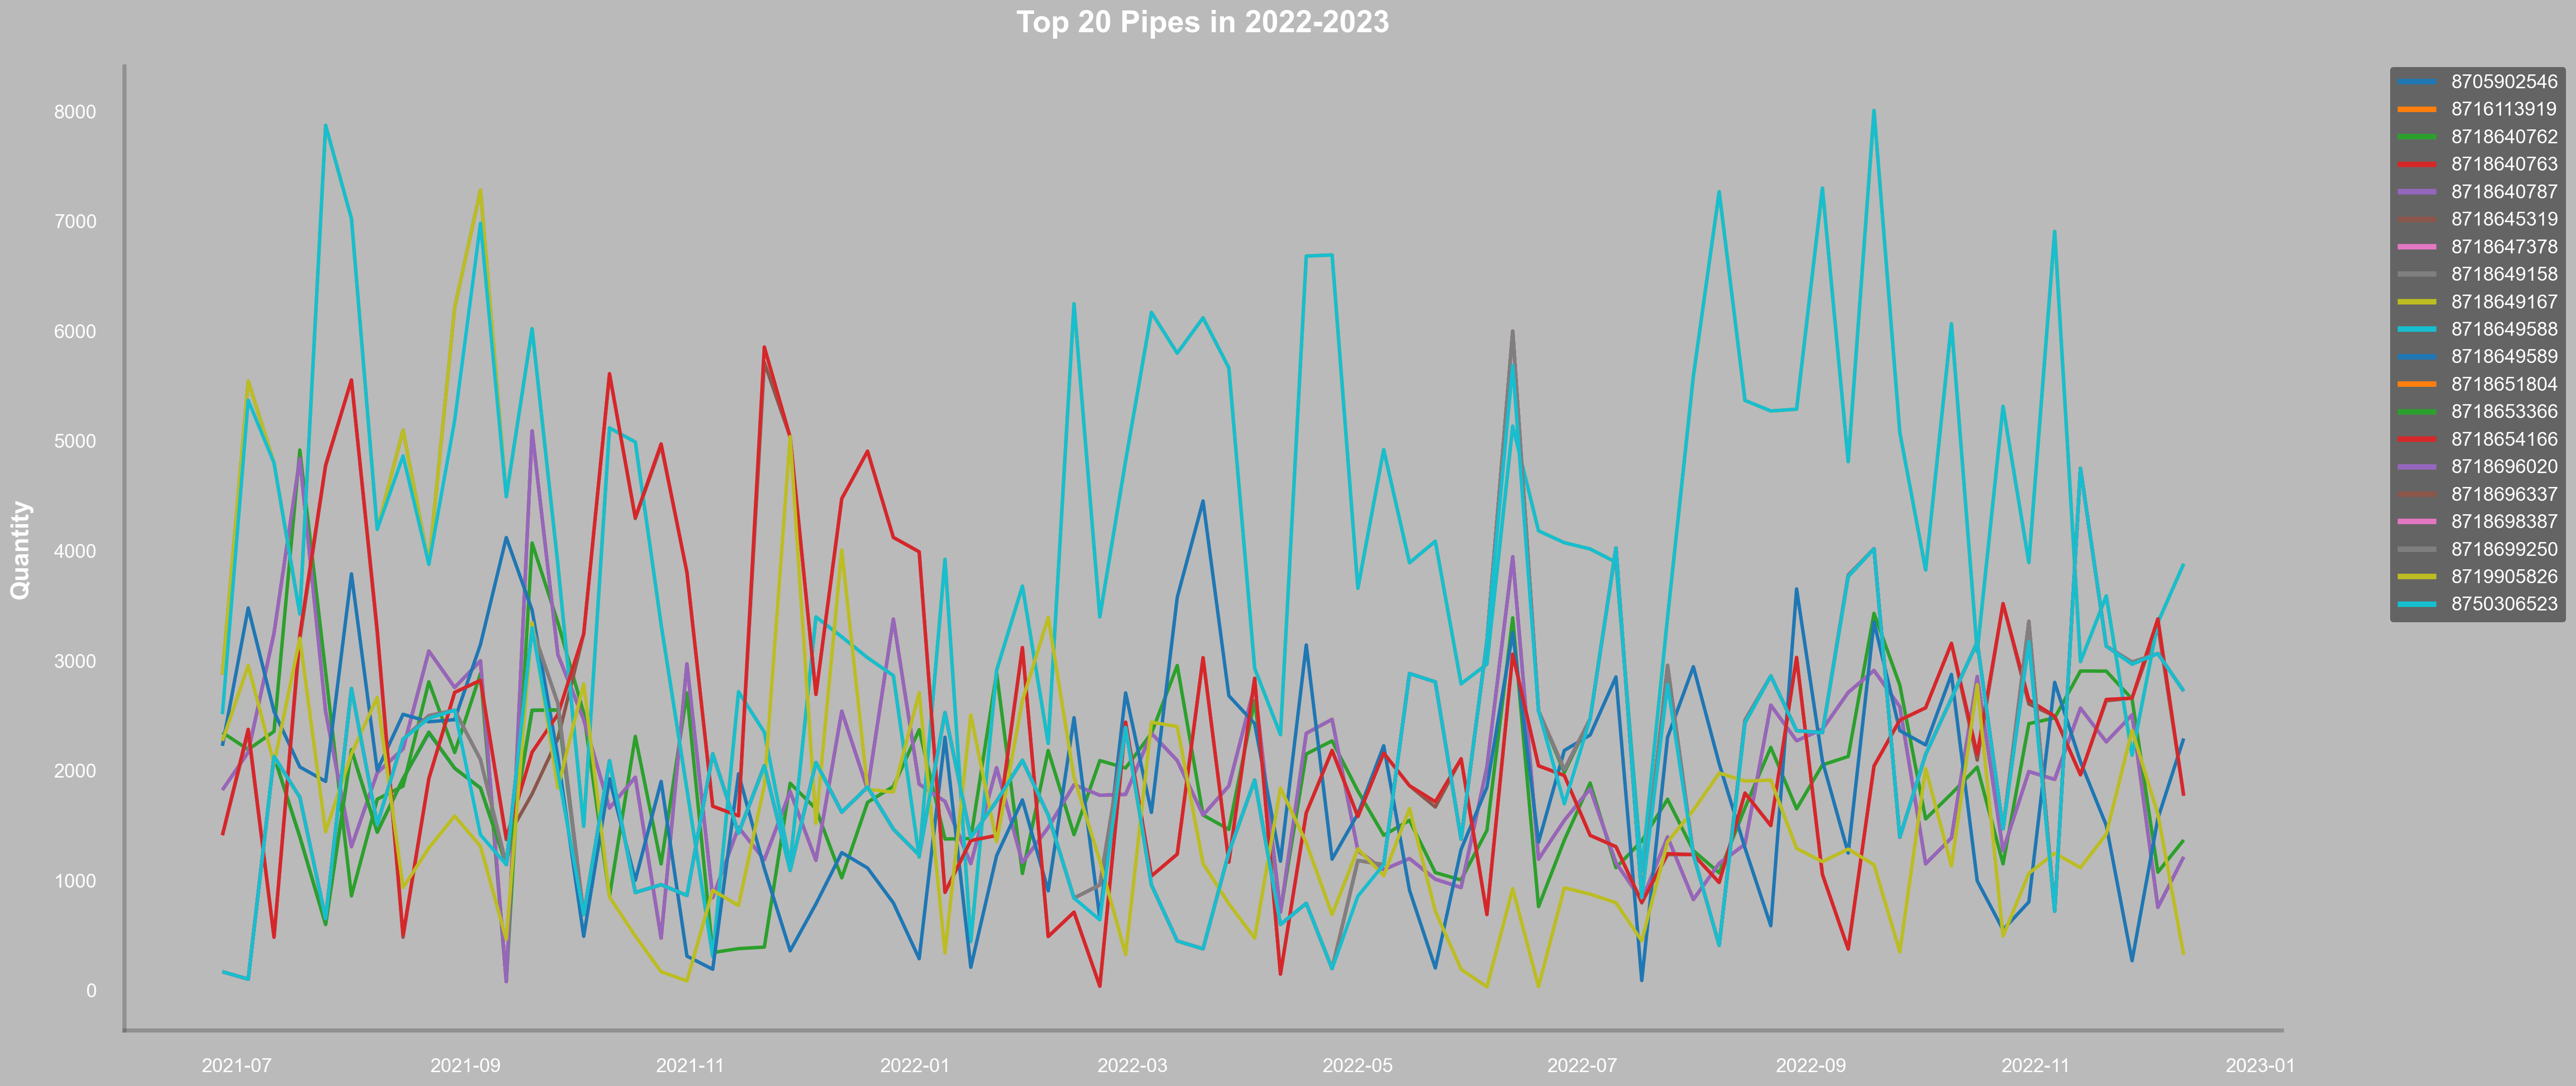

In [21]:
# plot the most popular 20 pipes throughout the given time period
configure_matplotlib(tick_major_pad=20)
fig, ax = plt.subplots(figsize=(25, 12))
sns.lineplot(data=filled_df, palette="tab10", linewidth=2.5, ax=ax, dashes=False)
plt.ylabel("Quantity")
plt.title("Top 20 Pipes in 2022-2023")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [22]:
selected_pipe_index = 9

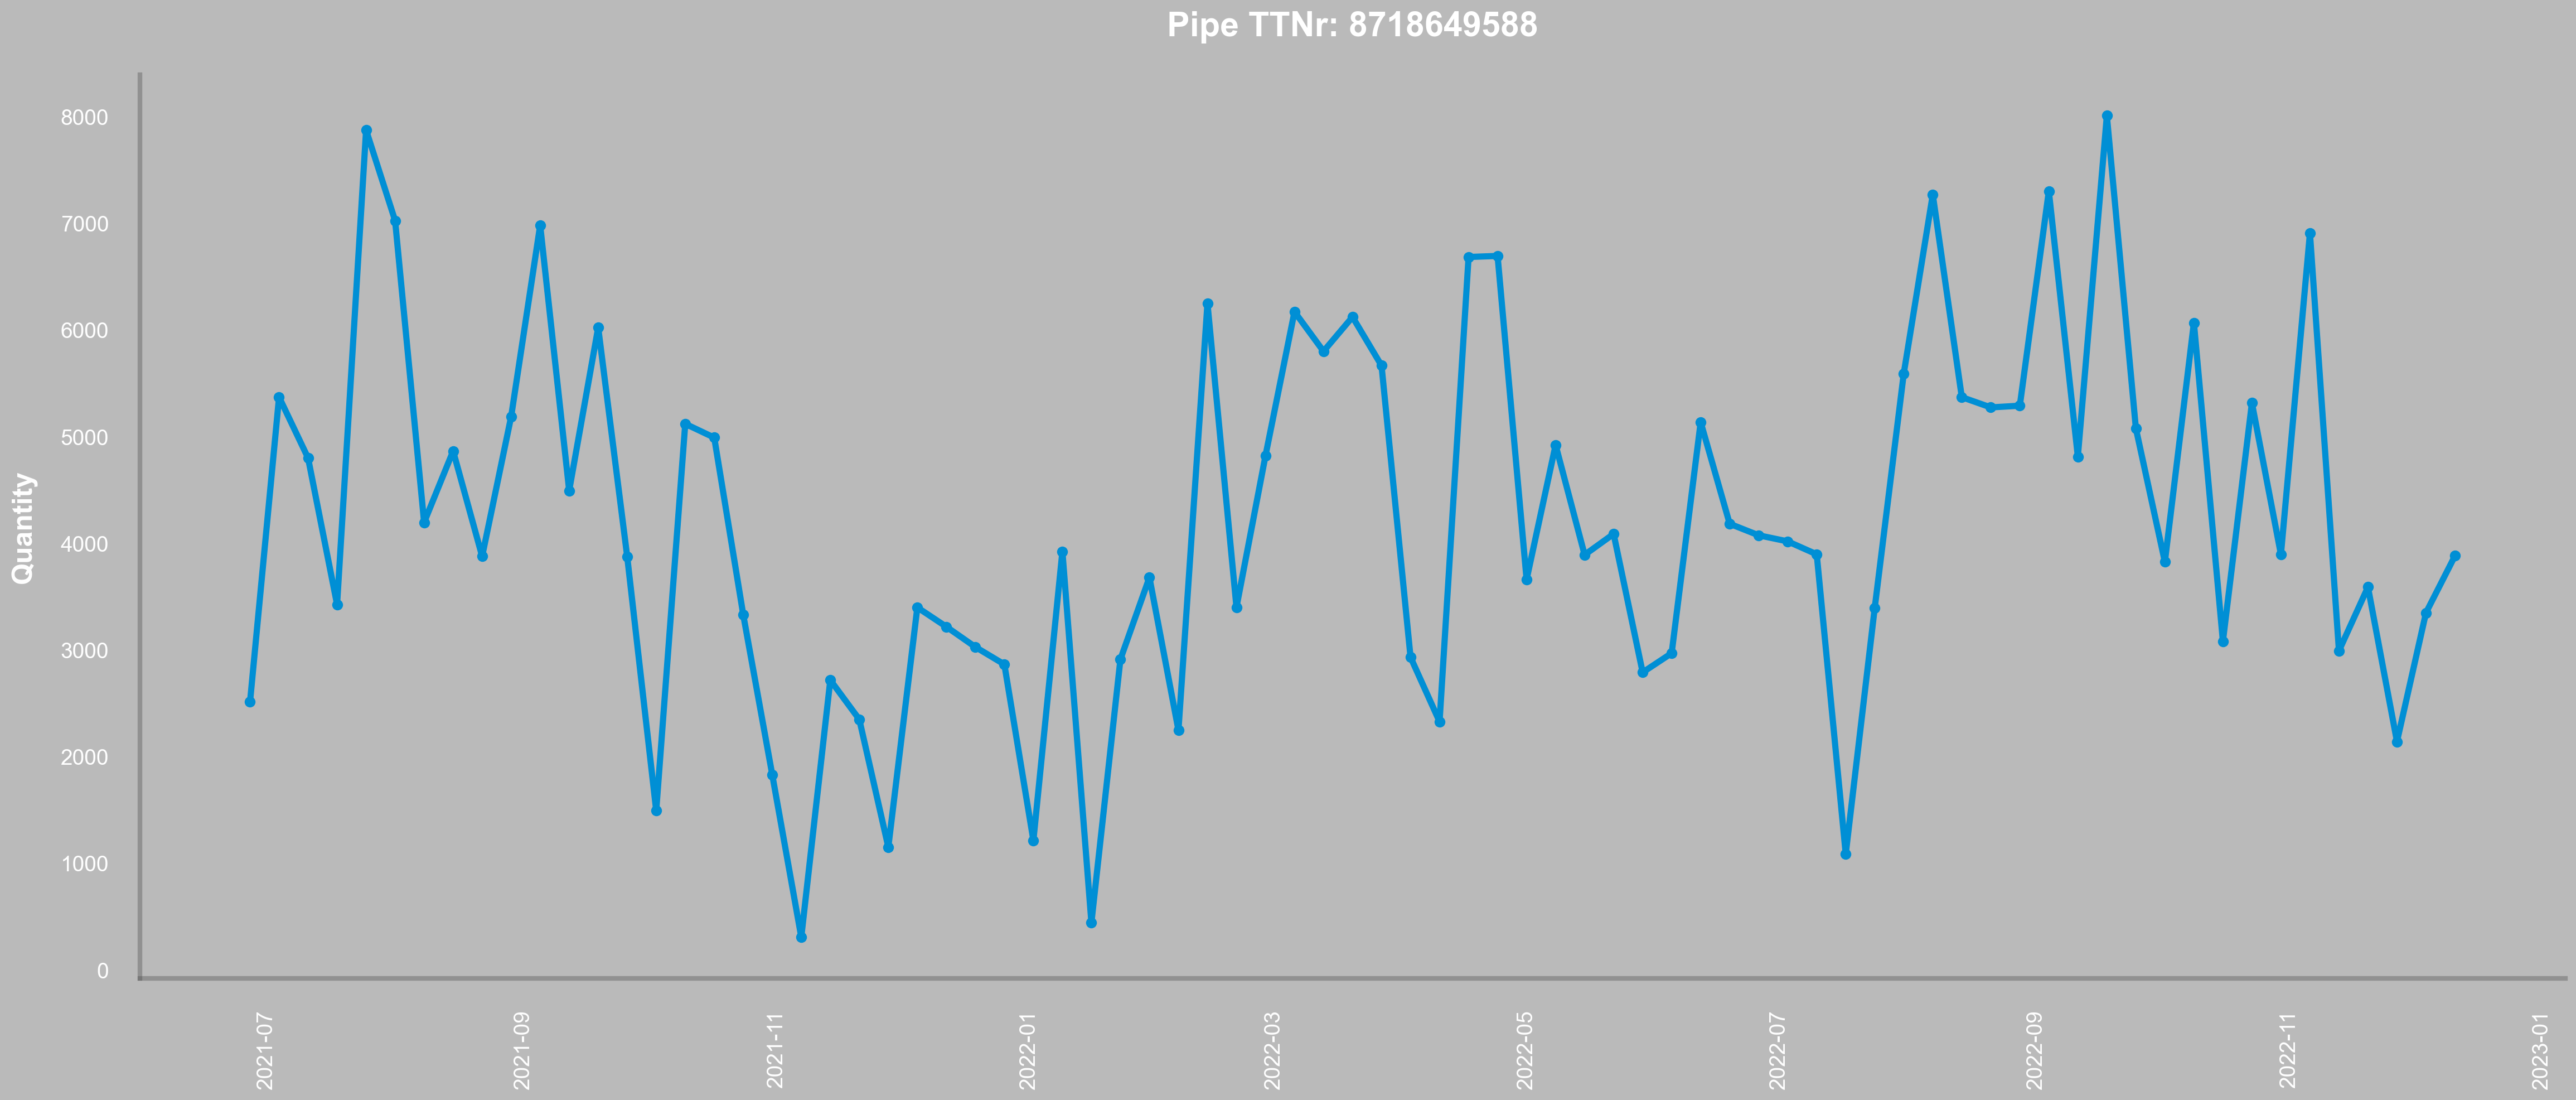

In [23]:
# configure_matplotlib(tick_major_pad=20)
_, ax = plt.subplots(figsize=(25, 10))
selected_pipe = filled_df.columns[selected_pipe_index]
plt.plot(filled_df[selected_pipe], marker='o')
plt.xticks(rotation=90)
plt.ylabel("Quantity")
plt.title(f"Pipe TTNr: {filled_df.columns[selected_pipe_index]}")
plt.show()

In [24]:
formatted_df = format_time_series_df(master_df=all_in_one_T, selected_years=selected_years)
formatted_df.index = formatted_df.index.to_timestamp(how="E")
formatted_df.index = formatted_df.index.normalize()
formatted_df = formatted_df.iloc[1:, :]
formatted_df.index.shape

(76,)

In [25]:
all_in_one_T

Pipe TTNr,8705902546,8716113919,8718640762,8718640763,8718640787,8718645319,8718647378,8718649158,8718649167,8718649588,8718649589,8718651804,8718653366,8718654166,8718696020,8718696337,8718698387,8718699250,8719905826,8750306523
2021-04-21,170.0,170.0,2347.0,1824.0,1824.0,1412.0,1412.0,2874.0,2874.0,2514.0,2226.0,170.0,170.0,1412.0,170.0,170.0,170.0,170.0,2271.0,170.0
2021-05-07,102.0,102.0,2192.0,2168.0,2168.0,2352.0,2376.0,5547.0,5547.0,5371.0,3481.0,102.0,102.0,2376.0,102.0,102.0,102.0,102.0,2956.0,102.0
2021-05-20,2130.0,2130.0,2357.0,3253.0,3253.0,484.0,484.0,4800.0,4800.0,4800.0,2538.0,2130.0,2130.0,484.0,2130.0,2130.0,2130.0,2130.0,2064.0,2130.0
2021-05-28,1398.0,1758.0,4918.0,4842.0,4842.0,3196.0,3236.0,3426.0,3426.0,3426.0,2034.0,1758.0,1398.0,3236.0,1758.0,1758.0,1758.0,1758.0,3205.0,1758.0
2021-06-03,600.0,654.0,2897.0,2537.0,2537.0,4774.0,4782.0,7874.0,7874.0,7874.0,1902.0,654.0,600.0,4782.0,654.0,654.0,654.0,654.0,1444.0,654.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-02,4752.0,4752.0,2907.0,2569.0,2569.0,1962.0,1962.0,2992.0,2992.0,2992.0,2082.0,4752.0,4752.0,1962.0,4752.0,4752.0,4752.0,4752.0,1117.0,4752.0
2023-02-08,3134.0,3134.0,2906.0,2262.0,2262.0,2636.0,2648.0,3590.0,3590.0,3590.0,1502.0,3134.0,3134.0,2648.0,3134.0,3134.0,3134.0,3134.0,1422.0,3134.0
2023-02-16,2970.0,2988.0,2652.0,2508.0,2508.0,2660.0,2660.0,2141.0,2141.0,2141.0,270.0,2988.0,2970.0,2660.0,2988.0,2988.0,2988.0,2988.0,2368.0,2970.0
2023-02-24,3066.0,3066.0,1076.0,756.0,756.0,3322.0,3382.0,3349.0,3349.0,3349.0,1566.0,3066.0,3066.0,3382.0,3066.0,3066.0,3066.0,3066.0,1604.0,3066.0


In [26]:
formatted_df

Pipe TTNr,8705902546,8716113919,8718640762,8718640763,8718640787,8718645319,8718647378,8718649158,8718649167,8718649588,8718649589,8718651804,8718653366,8718654166,8718696020,8718696337,8718698387,8718699250,8719905826,8750306523
2021-09-26,102.0,102.0,2192.0,2168.0,2168.0,2352.0,2376.0,5547.0,5547.0,5371.0,3481.0,102.0,102.0,2376.0,102.0,102.0,102.0,102.0,2956.0,102.0
2021-10-03,2130.0,2130.0,2357.0,3253.0,3253.0,484.0,484.0,4800.0,4800.0,4800.0,2538.0,2130.0,2130.0,484.0,2130.0,2130.0,2130.0,2130.0,2064.0,2130.0
2021-10-10,1398.0,1758.0,4918.0,4842.0,4842.0,3196.0,3236.0,3426.0,3426.0,3426.0,2034.0,1758.0,1398.0,3236.0,1758.0,1758.0,1758.0,1758.0,3205.0,1758.0
2021-10-17,600.0,654.0,2897.0,2537.0,2537.0,4774.0,4782.0,7874.0,7874.0,7874.0,1902.0,654.0,600.0,4782.0,654.0,654.0,654.0,654.0,1444.0,654.0
2021-10-24,2190.0,2748.0,860.0,1308.0,1308.0,5556.0,5556.0,7025.0,7025.0,7025.0,3791.0,2748.0,2190.0,5556.0,2748.0,2748.0,2748.0,2748.0,2154.0,2748.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-05,4752.0,4752.0,2907.0,2569.0,2569.0,1962.0,1962.0,2992.0,2992.0,2992.0,2082.0,4752.0,4752.0,1962.0,4752.0,4752.0,4752.0,4752.0,1117.0,4752.0
2023-02-12,3134.0,3134.0,2906.0,2262.0,2262.0,2636.0,2648.0,3590.0,3590.0,3590.0,1502.0,3134.0,3134.0,2648.0,3134.0,3134.0,3134.0,3134.0,1422.0,3134.0
2023-02-19,2970.0,2988.0,2652.0,2508.0,2508.0,2660.0,2660.0,2141.0,2141.0,2141.0,270.0,2988.0,2970.0,2660.0,2988.0,2988.0,2988.0,2988.0,2368.0,2970.0
2023-02-26,3066.0,3066.0,1076.0,756.0,756.0,3322.0,3382.0,3349.0,3349.0,3349.0,1566.0,3066.0,3066.0,3382.0,3066.0,3066.0,3066.0,3066.0,1604.0,3066.0


In [35]:
# save the dataframe to a csv file
os.chdir("/Users/ozansahin/Documents/GitHub/Bosch-Data-Analysis/")
formatted_df.to_csv("pipe_dataset.csv")